In [26]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')


tf.__version__

'1.15.0'

In [27]:
mnist = tf.keras.datasets.mnist #28 x 28 images of handwritten digits 0-9
print(mnist)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

<module 'tensorflow.python.keras.api._v1.keras.datasets.mnist' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v1\\keras\\datasets\\mnist\\__init__.py'>


Normalize will place all data values in between $0$ and $1$, this aids in performance for the network.

In [51]:
import matplotlib.pyplot as plt

#plt.imshow(x_train[0], cmap = plt.cm.binary)
#plt.show()

#print(x_train[0])

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) #Flatten turns an array into a single list
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)


Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2649 - acc: 0.9223
Epoch 2/3
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1054 - acc: 0.9676
Epoch 3/3
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0711 - acc: 0.9776


In [29]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 18us/sample - loss: 0.1124 - acc: 0.9676
0.11239768071491271 0.9676


In [52]:
model.save('epic_num_reader.model')

In [53]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [54]:
print(len(x_test))
predictions = new_model.predict(x_test)

10000


9


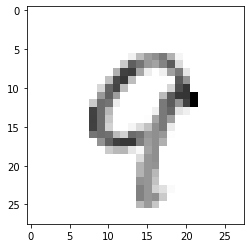

In [114]:
import numpy as np
import random

sample = random.randint(0, 10000)

print(np.argmax(predictions[sample]))

plt.imshow(x_test[sample], cmap=plt.cm.binary)
plt.show()